Once we know the DE genes from our array data, we have all the genes that somehow play a role in the cell. In order to know more about this set of genes at a biological level, we need to know their biological role in terms of their function. Analyzing the GO categories in the set can do this. This recipe is about the enrichment of gene sets with GO terms.

一旦我们从阵列数据中知道DE基因，我们就拥有了在细胞中发挥作用的所有基因。为了在生物学水平上更多地了解这组基因，我们需要从它们的功能方面了解它们的生物学作用。分析集合中的GO类别可以做到这一点。这个教程是关于用GO术语丰富基因集的。

1. First, install and load the annotation database and COststs library as follows:

 安装并加载注释数据库和GOststs包：

In [1]:
BiocManager::install(c("hgu85av2.db","GOstats"))

Bioconductor version 3.8 (BiocManager 1.30.1), R 3.5.1 (2018-07-02)
Installing package(s) 'hgu85av2.db', 'GOstats'
Warning message:
"package 'hgu85av2.db' is not available (for R version 3.5.1)"also installing the dependencies 'GSEABase', 'Category', 'RBGL', 'AnnotationForge', 'Rgraphviz'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  无法打开URL'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'GSEABase' successfully unpacked and MD5 sums checked
package 'Category' successfully unpacked and MD5 sums checked
package 'RBGL' successfully unpacked and MD5 sums checked
package 'AnnotationForge' successfully unpacked and MD5 sums checked
package 'Rgraphviz' successfully unpacked and MD5 sums checked
package 'GOstats' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpuEvWa0\downloaded_packages


Update old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocInstaller',
  'BiocManager', 'BiocParallel', 'biomaRt', 'Biostrings', 'broom', 'callr',
  'caret', 'checkpoint', 'class', 'cli', 'clipr', 'clusterProfiler',
  'codetools', 'colorspace', 'curl', 'data.table', 'dbplyr', 'ddalpha',
  'digest', 'dimRed', 'doParallel', 'DOSE', 'dplyr', 'enrichplot', 'evaluate',
  'fansi', 'fgsea', 'foreign', 'GenomeInfoDb', 'GenomicFeatures', 'ggplot2',
  'GOSemSim', 'haven', 'htmlwidgets', 'httpuv', 'httr', 'igraph', 'ipred',
  'IRdisplay', 'IRkernel', 'jsonlite', 'kernlab', 'knitr', 'later', 'lattice',
  'lava', 'magic', 'markdown', 'MASS', 'Matrix', 'mgcv', 'mime', 'MKmisc',
  'ModelMetrics', 'modelr', 'muscle', 'openssl', 'pillar', 'pkgconfig', 'pls',
  'processx', 'purrr', 'qvalue', 'R6', 'Rcpp', 'readr', 'readxl', 'recipes',
  'repr', 'reprex', 'rlang', 'rmarkdown', 'robustbase', 'Rsamtools',
  'rstudioapi', 'RUnit', 'scales', 'sfsmisc', 'shiny', 'stringi', 'stringr',
  'survival', 'testthat'

In [1]:
library(GOstats)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which.min

Welcome to Bioconductor

    

In [2]:
library(biomaRt)

In [4]:
library(hgu95av2.db)

Loading required package: org.Hs.eg.db




2.Prepare the input data from the results of the leukemia data analysis(Working with the data of multiple classes recipe). Create two sets, one that consists of all the genes in the data and the other that consists of DE genes, as follows: 

 准备白血病数据分析结果的输入数据(使用多个类的处方数据)。创建两个集合，一个包含数据中的所有基因，另一个包含DE基因，如下所示:

In [5]:
# Working with the data of multiple classes 
library(leukemiasEset)
data(leukemiasEset)
pheno <- pData(leukemiasEset)
mydata <- leukemiasEset[, sampleNames(leukemiasEset)[c(1:3, 13:15, 25:27, 49:51)]]
design <- model.matrix(~0 + factor(pData(mydata)$LeukemiaType))
colnames(design) <- unique(as.character(pData(mydata)$LeukemiaType))
library(limma)
fit <- lmFit(mydata, design)
contrast.matrix <- makeContrasts(NoL- ALL, NoL- AML, NoL- CLL, levels = design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)
tested2 <- topTable(fit2,adjust="fdr",sort.by="B",number=Inf, coef=1)
DE2 <- tested2[tested2$adj.P.Val < 0.01,]


Attaching package: 'limma'

The following object is masked from 'package:BiocGenerics':

    plotMA



In [6]:
all_genes <- rownames(tested2)
head(all_genes)

[1] "ENSG00000152078" "ENSG00000117519" "ENSG00000145850" "ENSG00000170180"
[5] "ENSG00000087586" "ENSG00000047597"

In [7]:
sel_genes <- rownames(DE2)
head(sel_genes)

[1] "ENSG00000152078" "ENSG00000117519" "ENSG00000145850" "ENSG00000170180"
[5] "ENSG00000087586" "ENSG00000047597"

3. Map these sets to their Entrez IDs as follows:

 将这些集合映射到它们的Entrez id，如下所示:

In [8]:
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
# set the mart

In [10]:
all_genes <- c(getBM(filters= "ensembl_gene_id", attributes=
c("entrezgene"), values= all_genes, mart= mart))
# get entrez idsfor all genes

In [11]:
sel_genes <- c(getBM(filters= "ensembl_gene_id", attributes=
c("entrezgene"), values= sel_genes, mart= mart))
# get entrez ids for DE

4. Now, define a cutoff for the test sstatistics as follows:

 为测试sstatistics定义一个截止值，如下所示：

In [12]:
hgCutoff <- 0.05

5. The next thing you need is a GOHyperGParams object that will be used as an input parameter for the enrichment computations. It can computed with the following function:

 接下来需要的是一个GOHyperGParams对象，它将用作富集计算的输入参数。可以通过以下函数计算:

In [13]:
params <- new("GOHyperGParams", geneIds=sel_genes, universeGeneIds= all_genes, annotation="hgu95av2.db", ontology="BP", pvalueCutoff=hgCutoff, conditional=FALSE, testDirection="over")

Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"Warning message in makeValidParams(.Object):
"converting univ from list to atomic vector via unlist"Warning message in makeValidParams(.Object):
"removing duplicate IDs in universeGeneIds"

6. Once you have your GOHyperGParams object, perform a hypergeometric test to get the p-value for the GO annotations as follows:

 有了GOHyperGParams对象后，执行超几何测试以获得GO注释的p值，如下所示:

In [14]:
hgOver <- hyperGTest(params)
hgOver

Gene to GO BP  test for over-representation 
3208 GO BP ids tested (468 have p < 0.05)
Selected gene set size: 124 
    Gene universe size: 7912 
    Annotation package: hgu95av2 

7. Check the summary of the object tht was created by typing the following command:

 输入以下命令检查创建的对象的摘要:

In [15]:
summary(hgOver)

GOBPID,Pvalue,OddsRatio,ExpCount,Count,Size,Term
GO:0006779,1.994009e-09,51.712251,0.25075834,7,16,porphyrin-containing compound biosynthetic process
GO:0006778,2.509953e-09,31.525355,0.39180991,8,25,porphyrin-containing compound metabolic process
GO:0046501,2.619168e-09,98.949153,0.15672396,6,10,protoporphyrinogen IX metabolic process
GO:0033014,3.345953e-09,46.535043,0.26643074,7,17,tetrapyrrole biosynthetic process
GO:0042168,1.282608e-08,35.782380,0.31344793,7,20,heme metabolic process
GO:0006783,3.557558e-08,49.449153,0.21941355,6,14,heme biosynthetic process
GO:0006782,4.704565e-08,109.033613,0.12537917,5,8,protoporphyrinogen IX biosynthetic process
GO:0033013,7.654902e-08,18.451843,0.57987867,8,37,tetrapyrrole metabolic process
GO:0019755,6.815952e-06,51.886667,0.14105157,4,9,one-carbon compound transport
GO:0042440,8.465607e-06,11.304774,0.75227503,7,48,pigment metabolic process


8. Get the number of genes associated with the different categories as follows:
 
 得到与不同类别相关的基因数量如下：

In [16]:
geneCounts(hgOver)

GO:0006779 GO:0006778 GO:0046501 GO:0033014 GO:0042168 GO:0006783 GO:0006782 
         7          8          6          7          7          6          5 
GO:0033013 GO:0019755 GO:0042440 GO:1905446 GO:0046148 GO:0055080 GO:0051188 
         8          4          7          3          6         20         11 
GO:0055065 GO:0042592 GO:0098771 GO:0050801 GO:0007052 GO:0044772 GO:0010389 
        19         36         20         21          7         15          8 
GO:0055072 GO:0000086 GO:0048878 GO:0032536 GO:0007346 GO:0035378 GO:0070541 
         6          9         25          3         16          2          2 
GO:0044770 GO:1902749 GO:0072488 GO:0030218 GO:0055076 GO:0044839 GO:0048821 
        15          8          3          7          7          9          4 
GO:1902850 GO:0006873 GO:0051693 GO:0055015 GO:0002262 GO:1901880 GO:0030835 
         7         17          4          3          8          5          4 
GO:0051186 GO:0015696 GO:0034101 GO:0051261 GO:0051494 GO:0015701 GO:1901990 
        14          6          7          6          7          4         11 
GO:0032272 GO:0010961 GO:0000278 GO:0043242 GO:1903047 GO:0007051 GO:0006638 
         5          2         20          5         18          7          6 
GO:0030003 GO:0043457 GO:0010038 GO:0055012 GO:0006875 GO:1901987 GO:0055082 
        16          3         12          3         15         11         18 
GO:0055002 GO:0006855 GO:1901879 GO:0007079 GO:0015670 GO:0015793 GO:0031133 
         7          5          5          2          2          2          2 
GO:1901857 GO:1905448 GO:0030071 GO:0030834 GO:0006833 GO:0051234 GO:0007091 
         2          2          4          4          3         62          4 
GO:1902099 GO:0002082 GO:0010965 GO:0030042 GO:0030837 GO:0044784 GO:0046688 
         4          3          4          4          4          4          4 
GO:0055001 GO:0051179 GO:0051306 GO:0090068 GO:0015840 GO:0006641 GO:0045787 
         7         73          4          9          2          5         11 
GO:0051301 GO:1902904 GO:0051983 GO:0071158 GO:0007088 GO:0048872 GO:0000070 
        13          6          5          5          7          9          6 
GO:0015893 GO:0010564 GO:1905818 GO:0008608 GO:0042044 GO:0007059 GO:0015711 
         7         15          4          3          3          8         11 
GO:0019725 GO:0043624 GO:0032535 GO:0003062 GO:0003097 GO:0015791 GO:0051305 
        19          6         10          2          2          2          2 
GO:0051597 GO:1903862 GO:0098813 GO:0006879 GO:0051303 GO:0050000 GO:0010971 
         2          2          7          4          4          4          3 
GO:0043244 GO:0006977 GO:0072413 GO:0072431 GO:1902400 GO:1902402 GO:1902403 
         5          4          4          4          4          4          4 
GO:0007010 GO:0050901 GO:0046916 GO:0006810 GO:0071248 GO:0033047 GO:0051988 
        22          3          5         59          7          4          2 
GO:0006639 GO:0051783 GO:0000226 GO:1902751 GO:0090066 GO:0000819 GO:0007586 
         5          7         11          3         12          6          5 
GO:0031571 GO:0044783 GO:0044819 GO:0140014 GO:0061515 GO:0007093 GO:0007017 
         4          4          4          8          4          6         13 
GO:0042908 GO:0051382 GO:0071474 GO:0051640 GO:0006536 GO:0031145 GO:0061756 
         2          2          2         14          3          3          3 
GO:0045931 GO:0065008 GO:0071156 GO:0010039 GO:0051146 GO:0006820 GO:0033045 
         6         51          5          3          8         12          4 
GO:0051304 GO:0072401 GO:0072422 GO:1901992 GO:0000212 GO:0010960 GO:0043249 
         4          4          4          4          2          2          2 
GO:0046689 GO:0031333 GO:0072395 GO:0046486 GO:0007077 GO:0007100 GO:0051299 
         2          5          4         10          2          2          2 
GO:0071241 GO:0008016 GO:0048871 GO:1901989 GO:0030001 GO:0015669 GO:0035404 
         7          7 

In [18]:
universeCounts(hgOver)

GO:0006779 GO:0006778 GO:0046501 GO:0033014 GO:0042168 GO:0006783 GO:0006782 
        16         25         10         17         20         14          8 
GO:0033013 GO:0019755 GO:0042440 GO:1905446 GO:0046148 GO:0055080 GO:0051188 
        37          9         48          5         41        475        162 
GO:0055065 GO:0042592 GO:0098771 GO:0050801 GO:0007052 GO:0044772 GO:0010389 
       440       1195        482        525         72        319         98 
GO:0055072 GO:0000086 GO:0048878 GO:0032536 GO:0007346 GO:0035378 GO:0070541 
        52        127        739          8        374          2          2 
GO:0044770 GO:1902749 GO:0072488 GO:0030218 GO:0055076 GO:0044839 GO:0048821 
       342        109          9         83         83        140         22 
GO:1902850 GO:0006873 GO:0051693 GO:0055015 GO:0002262 GO:1901880 GO:0030835 
        85        433         23         10        115         42         24 
GO:0051186 GO:0015696 GO:0034101 GO:0051261 GO:0051494 GO:0015701 GO:1901990 
       322         65         91         66         94         26        221 
GO:0032272 GO:0010961 GO:0000278 GO:0043242 GO:1903047 GO:0007051 GO:0006638 
        46          3        587         47        504         98         72 
GO:0030003 GO:0043457 GO:0010038 GO:0055012 GO:0006875 GO:1901987 GO:0055082 
       426         13        268         14        394        238        523 
GO:0055002 GO:0006855 GO:1901879 GO:0007079 GO:0015670 GO:0015793 GO:0031133 
       106         53         53          4          4          4          4 
GO:1901857 GO:1905448 GO:0030071 GO:0030834 GO:0006833 GO:0051234 GO:0007091 
         4          4         32         32         15       2904         33 
GO:1902099 GO:0002082 GO:0010965 GO:0030042 GO:0030837 GO:0044784 GO:0046688 
        33         16         34         34         34         34         34 
GO:0055001 GO:0051179 GO:0051306 GO:0090068 GO:0015840 GO:0006641 GO:0045787 
       115       3626         36        184          5         60        260 
GO:0051301 GO:1902904 GO:0051983 GO:0071158 GO:0007088 GO:0048872 GO:0000070 
       340         88         61         61        119        187         89 
GO:0015893 GO:0010564 GO:1905818 GO:0008608 GO:0042044 GO:0007059 GO:0015711 
       120        429         38         19         19        156        269 
GO:0019725 GO:0043624 GO:0032535 GO:0003062 GO:0003097 GO:0015791 GO:0051305 
       617         94        233          6          6          6          6 
GO:0051597 GO:1903862 GO:0098813 GO:0006879 GO:0051303 GO:0050000 GO:0010971 
         6          6        127         41         41         42         21 
GO:0043244 GO:0006977 GO:0072413 GO:0072431 GO:1902400 GO:1902402 GO:1902403 
        69         43         43         43         43         43         43 
GO:0007010 GO:0050901 GO:0046916 GO:0006810 GO:0071248 GO:0033047 GO:0051988 
       780         22         70       2843        133         44          7 
GO:0006639 GO:0051783 GO:0000226 GO:1902751 GO:0090066 GO:0000819 GO:0007586 
        71        134        286         23        330        103         73 
GO:0031571 GO:0044783 GO:0044819 GO:0140014 GO:0061515 GO:0007093 GO:0007017 
        46         46         46        175         47        106        380 
GO:0042908 GO:0051382 GO:0071474 GO:0051640 GO:0006536 GO:0031145 GO:0061756 
         8          8          8        426         25         25         25 
GO:0045931 GO:0065008 GO:0071156 GO:0010039 GO:0051146 GO:0006820 GO:0033045 
       109       2414         78         26        182        345         51 
GO:0051304 GO:0072401 GO:0072422 GO:1901992 GO:0000212 GO:0010960 GO:0043249 
        51         51         51         51          9          9          9 
GO:0046689 GO:0031333 GO:0072395 GO:0046486 GO:0007077 GO:0007100 GO:0051299 
         9         81         52        268         10         10         10 
GO:0071241 GO:0008016 GO:0048871 GO:1901989 GO:0030001 GO:0015669 GO:0035404 
       154        155 

9. Also, plot the GO directed acyclic graph(DAG) as follows:

 另外，绘制GO有向无环图(DAG)如下：

Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head

"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skippe

"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skippe

"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skippe

"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skippe

"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skippe

"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skippe

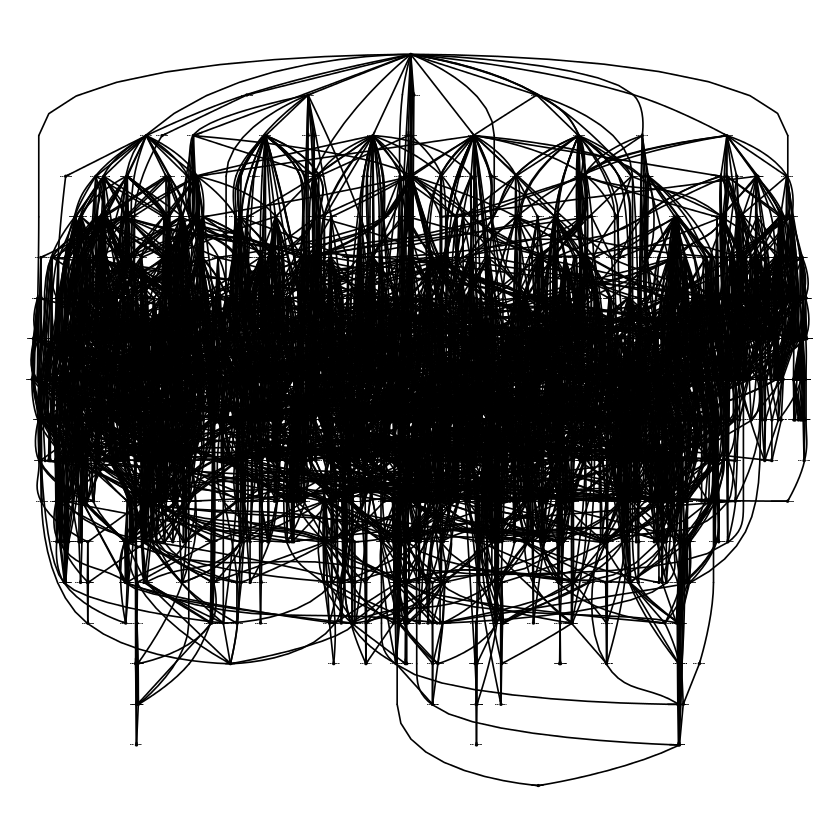

In [19]:
plot(goDag(hgOver))

10. Finally, generate the report as an HTML file that can be read using any browser, as follows:

 最后，将报告生成为HTML文件，可以使用任何浏览器读取，如下所示：

In [25]:
htmlReport(hgOver, file="C:/Users/Administrator/bioinformatics_with_R/chapter5/ALL_hgco.html")

("C:/Users/Administrator/bioinformatics_with_R/chapter5/ALL_hgco.html")